In [11]:
import pandas as pd
import seaborn as snb
import numpy as np
import matplotlib.pyplot as plt
# Machine learning libraries
import sklearn as skl


In [10]:
data = pd.read_csv("./Data/iris_dataset/iris.dataCopy.csv")

In [12]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


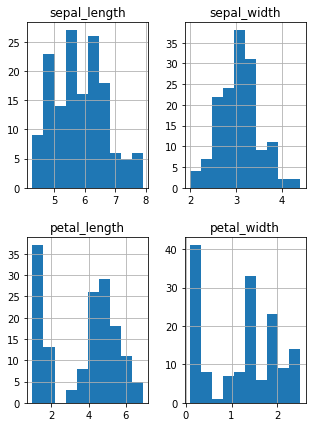

In [17]:
data.hist(figsize=(5,7))
plt.show()

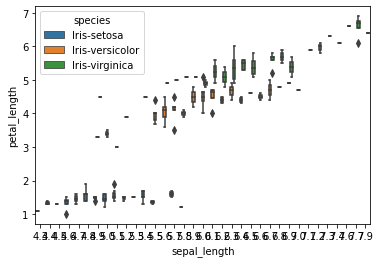

In [19]:
snb.boxplot(data=data, x="sepal_length", y="petal_length", hue="species")
plt.show()

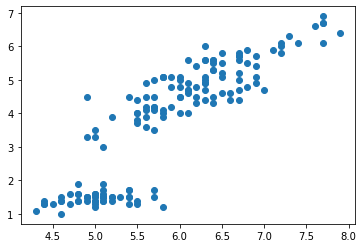

In [27]:
plt.scatter(x="sepal_length", y="petal_length",  data= data)

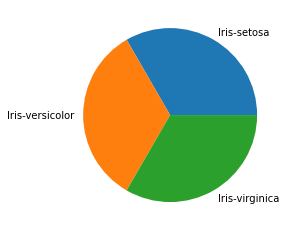

In [41]:
plt.pie(data["species"].value_counts(), labels=data["species"].unique())
plt.show()

In [87]:
# importing the  ML libraries for the algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LinearRegression
#  for building the models
from sklearn.model_selection import train_test_split
# for prepocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler # for normalising the data
# for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report# include all the metrices

In [88]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [43]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [60]:
# Prepocesing the data
encoder = LabelEncoder() #initialise the encoder
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y= data["species"]
encoder = encoder.fit_transform(y)
# display y
encoder

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [56]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [71]:
# Splitting the dataset
X_train,X_test,y_train,y_test = train_test_split( X,y, test_size = 0.3, random_state= 42)

# display the size
X_train.shape,X_test.shape, y_test.shape, y_train.shape
 

((105, 4), (45, 4), (45,), (105,))

In [72]:
# Normalisation
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.fit_transform(X_test)

In [76]:
# Building the model
decision_model = DecisionTreeClassifier()  #initializing the models
decision_model.fit(X_train,y_train)  #model fitting

# Prediction
y_predict_decision = decision_model.predict(X_test) #making prediction

In [93]:
# Evaluation
accuracy = accuracy_score(y_test, y_predict_decision)
accuracy

0.9555555555555556

In [94]:
# Clasification
from sklearn import metrics
print(metrics.classification_report(y_test, y_predict_decision))
 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.87      1.00      0.93        13

       accuracy                           0.96        45
      macro avg       0.96      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [95]:
# Initialising all the models
random_model = RandomForestClassifier()
kn_model = KNeighborsClassifier()
# linear_model = LinearRegression()

# Fitting the models
random_model.fit(X_train, y_train)
kn_model.fit(X_train, y_train)
# linear_model.fit(X_train, y_train)

# Predicting the models
y_predict_random = random_model.predict(X_test)
y_predict_kn = kn_model.predict(X_test)
# y_predict_linear = linear_model.predict(X_test)





In [102]:
random_accuracy = accuracy_score(y_test, y_predict_random)
print("random_accuracy:")
print(random_accuracy)
print("*********************")
kn_accuracy = accuracy_score(y_test, y_predict_kn)
print( "kn_accuracy:")
print( kn_accuracy)
print("*********************")
# linear_accuracy = accuracy_score(y_test, y_predict_linear)
# print(linear_accuracy)
# print("*********************")

random_accuracy:
0.9777777777777777
*********************
kn_accuracy:
0.9333333333333333
*********************


In [ ]:
# 
%pip install profileReport
from pandas_profile import profileReport

In [ ]:
profileReport(data)